TASK 1:

In [3]:
import numpy as np
a = np.floor(10 * np.random.rand(10,3) - 5)
print (a)

[[-2.  1. -4.]
 [ 2.  2. -1.]
 [-1. -3. -2.]
 [-2. -3. -4.]
 [ 4.  0.  4.]
 [ 2. -1. -1.]
 [-1. -4.  3.]
 [-3.  1.  1.]
 [-2.  1. -4.]
 [-5.  3.  2.]]


In [10]:
print ("nearest to 0.5:")
print(np.array([a[lines][np.argsort(np.abs(a[lines] - 0.5))[0]] for lines in range(10)]))

nearest to 0.5:
[ 1.  2. -1. -2.  0.  2. -1.  1.  1.  2.]


TASK 2:

In [5]:
b = np.floor(10 * np.random.rand(6,6) + 1)
print (b)

[[ 2.  8. 10.  5.  6.  1.]
 [ 5.  3. 10.  6.  3. 10.]
 [ 7.  2.  3.  8.  1.  1.]
 [ 5.  3.  7.  8.  1. 10.]
 [ 4. 10.  2.  4.  9.  5.]
 [ 5.  5.  9.  6.  4.  2.]]


In [11]:
print("sum str / min el st:")
print(np.array([np.sum(b[lines]) / np.min(b.transpose()[lines]) for lines in range(6)]))

sum str / min el st:
[16.  18.5 11.   8.5 34.  31. ]


TASK 3:

In [7]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x)

[6 2 0 3 0 0 5 7 0]


In [14]:
print("max after 0:")
print(np.max(np.array([(int)(x[i] == 0) * x[i+1] for i in range(len(x) - 1)])))

max after 0:
5


TASK 4:

In [16]:
y = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(y)
print(i)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 5 5 5 8]


In [18]:
print(np.array([y[j] + len(i[i == j]) for j in range(10)]))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


TASK 5:

In [1]:
import numpy as np
def kmeans(obs, k_or_guess, iter = 1000, thresh = 1e-05):
    M = obs.shape[0]
    N = obs.shape[1] 
    codebook = obs[:k_or_guess,:] # new centroids of clusters
    centroids = np.zeros((k_or_guess,N)) # previous centroids
    distortion = M * N * k_or_guess * np.max(obs) ** 2 # new distortion
    dist = 0 # previous distortion
    obs = np.expand_dims(obs, axis = 1) # adding оf a new axis
    i = 0
    while np.abs(distortion - dist) > thresh and i < iter:
        centroids = codebook
        dist = distortion
        clust = np.argmin(((obs - codebook) ** 2).sum(axis = 2), axis = 1) # clusters's numbers for each element
        m = np.zeros(M * k_or_guess * N).reshape(M, k_or_guess, N)
        m[np.arange(M), clust] = (obs - codebook)[np.arange(M),clust] / np.bincount(clust)[clust].reshape(M, 1)
        codebook = centroids + m.sum(axis = 0)
        clust = np.argmin(((obs - codebook) ** 2).sum(axis = 2),axis = 1) 
        m = np.zeros(M * k_or_guess * N).reshape(M, k_or_guess, N)
        m[np.arange(M), clust] = (obs - codebook)[np.arange(M), clust]
        distortion = np.sqrt((m ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return codebook, distortion

TASK 6:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
# data reading
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float) 

In [3]:
def num_clust(data, codebook): # points and their cluster's numbers
    k = len(codebook) # number of clusters
    i = np.arange(0, k) # indexes
    p = np.ones((k, len(data)))
    p[i] = np.arange(0, len(data))
    p = p.astype(int) # value type is int
    d1 = (data[p, 0] - codebook[i, 0].reshape(k, 1))**2
    d2 = (data[p, 1] - codebook[i, 1].reshape(k, 1))**2
    clust_num = ((d1 + d2)**(1/2)).argmin(axis = 0).astype(int)
    clusters = []
    for j in range(k):
        clusters.append(data[clust_num == j])
    return clusters

TEST 1: DEPENDENCE OF ANNUAL INCOME ON AGE

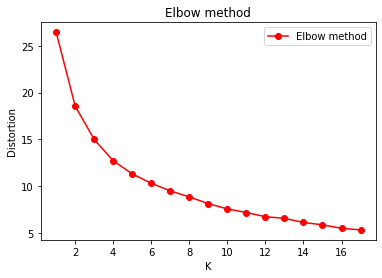

In [4]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[2,3]], k)[1])

plt.plot(K, dist, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

OPTIMAL K = 3

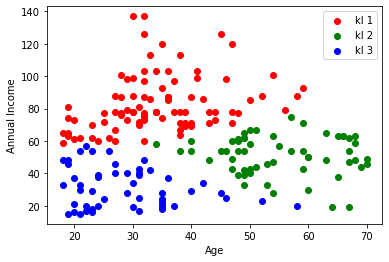

In [5]:
codebook, distortion = kmeans(data[:,[2,3]], 3)
clusters = num_clust(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

TEST 2: DEPENDENCE OF SPENDING SCORE ON AGE

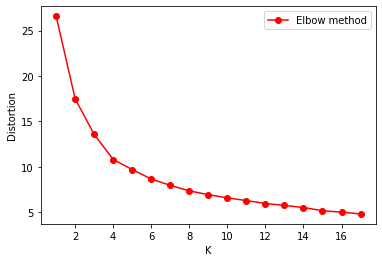

In [6]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[2,4]], k)[1])
    
plt.plot(K, dist, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

OPTIMAL K = 4

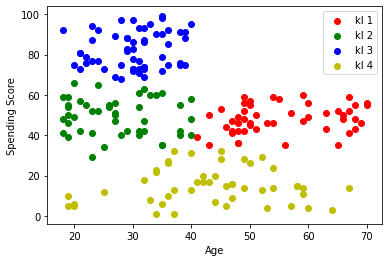

In [7]:
codebook, distortion = kmeans(data[:,[2,4]], 4)
clusters = num_clust(data[:,[2,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y', label='kl 4')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

TEST 3: DEPENDENCE OF SPENDING SCORE ON ANNUAL INCOME

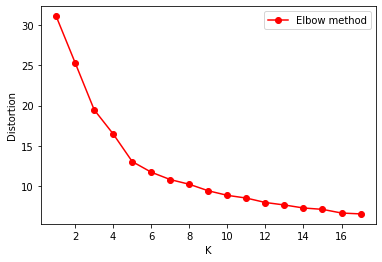

In [9]:
dist = []
K = range(1,18)
for k in K:
    dist.append(kmeans(data[:,[3,4]], k)[1])
    
plt.plot(K, dist, 'o-r', label='Elbow method')
plt.legend()
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

OPTIMAL K = 5

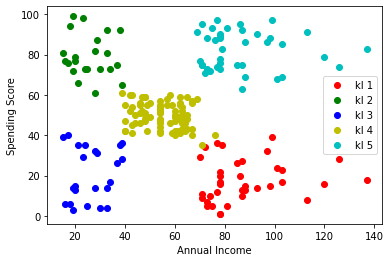

In [10]:
codebook, distortion = kmeans(data[:,[3,4]], 5)
clusters = num_clust(data[:,[3,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r', label='kl 1')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g', label='kl 2')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b', label='kl 3')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y', label='kl 4')
plt.scatter(clusters[4][:,0], clusters[4][:,1], c='c', label='kl 5')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()